# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


In [51]:
test = requests.get('http://api.openweathermap.org/data/2.5/weather?', params = params)

In [53]:
params["q"] = "toronto"
test.json()["clouds"]["all"]

0

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [54]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

#set up parameters
units = "metric" #specify units

params = {
    "q":city,
    "appid": weather_api_key,
    "units": units,
}


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
 # Run an API request for each of the cities
    try:

        params["q"] = city
        city_url = requests.get(url, params = params).json() #run the analysis
        # Parse the JSON and retrieve data
        city_weather = city_url["weather"][0]["main"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url["coord"]["lat"] #longitude 
        city_lng = city_url["coord"]["lon"] #longitude
        city_max_temp = city_url["main"]["temp_max"] #max temp
        city_humidity = city_url["main"]["humidity"] #humidity
        city_clouds = city_url["clouds"]["all"] #clouds
        city_wind = city_url["wind"]["speed"] #wind speed
        city_country = city_url["sys"]["country"] #country of city
        city_date = city_url["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print(f"{city} not found. Skipping...")
        pass

              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kudahuvadhoo
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | mulege
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | illoqqortoormiut
illoqqortoormiut not found. Skipping...
Processing Record 7 of Set 1 | calabozo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | zhanakorgan
Processing Record 10 of Set 1 | klaksvik
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | baykit
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | maragogi
Processing Record 15 of Set 1 | ouargaye
Processing Record 16 of Set 1 | novyy urgal
Processing Record 17 of Set 1 | alta floresta
Processing Record 18 of Set 1 | jiazi
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 |

In [55]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [56]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kudahuvadhoo,2.6708,72.8944,27.84,73,100,1.81,MV,1680052242
1,bethel,41.3712,-73.4140,7.58,55,0,0.00,US,1680052242
2,mulege,26.8833,-111.9833,21.35,28,0,2.38,MX,1680052242
3,albany,42.6001,-73.9662,4.96,67,6,3.24,US,1680051995
4,punta arenas,-53.1500,-70.9167,2.84,80,20,4.12,CL,1680052068


In [57]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [58]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kudahuvadhoo,2.6708,72.8944,27.84,73,100,1.81,MV,1680052242
1,bethel,41.3712,-73.4140,7.58,55,0,0.00,US,1680052242
2,mulege,26.8833,-111.9833,21.35,28,0,2.38,MX,1680052242
3,albany,42.6001,-73.9662,4.96,67,6,3.24,US,1680051995
4,punta arenas,-53.1500,-70.9167,2.84,80,20,4.12,CL,1680052068


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

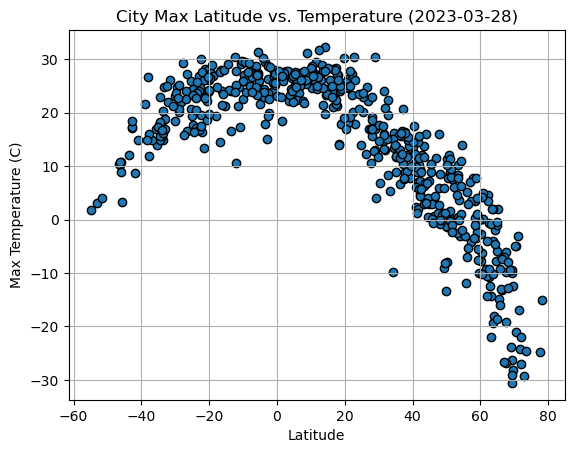

In [22]:
#create convenience function
def scatter(x_dat, y_dat, xlab, ylab, title, fig_name):
    x = x_dat
    y = y_dat
    plt.scatter(x = x, y = y, edgecolors = "black")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.savefig(f"../output_data/{fig_name}")
    plt.show()

# Build scatter plot for latitude vs. temperature
x = city_data_df["Lat"]
y = city_data_df["Max Temp"]

scatter(x, y, "Latitude", "Max Temperature (C)", "City Max Latitude vs. Temperature (2023-03-28)", "Fig1.png")


#### Latitude Vs. Humidity

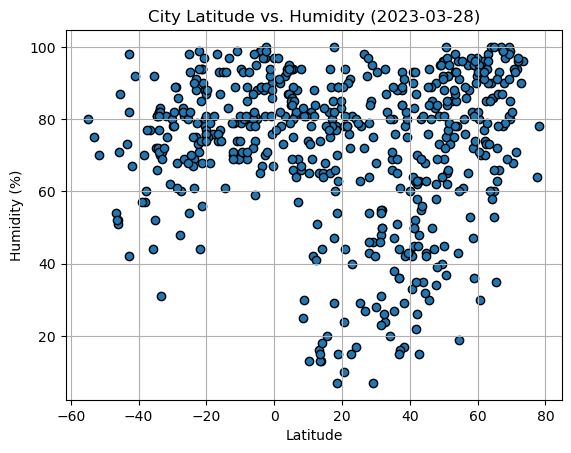

In [23]:

scatter(city_data_df["Lat"], city_data_df["Humidity"], "Latitude", "Humidity (%)", "City Latitude vs. Humidity (2023-03-28)", "Fig2.png")


#### Latitude Vs. Cloudiness

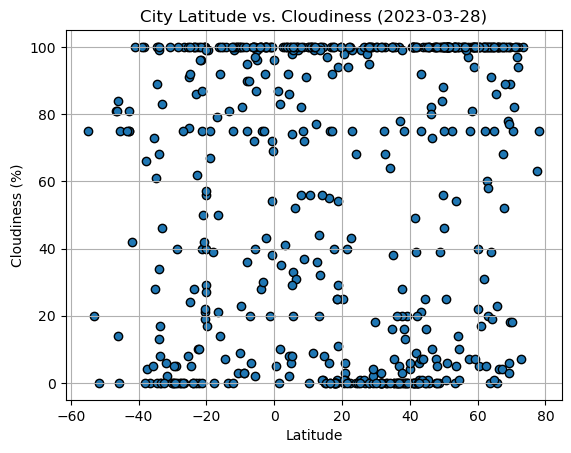

In [59]:

scatter(city_data_df["Lat"], city_data_df["Cloudiness"], "Latitude", "Cloudiness (%)", "City Latitude vs. Cloudiness (2023-03-28)", "Fig3.png")


#### Latitude vs. Wind Speed Plot

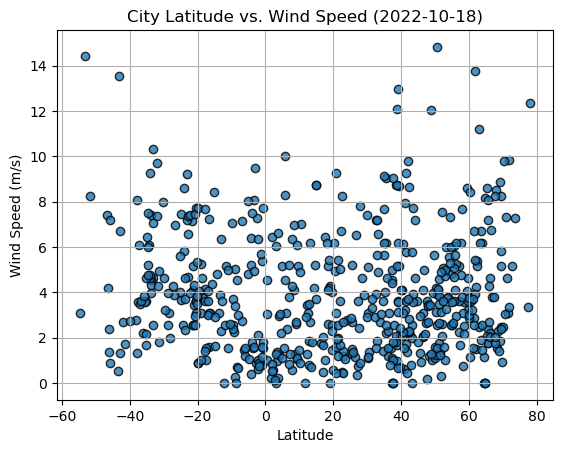

In [11]:
scatter(city_data_df["Lat"], city_data_df["Wind Speed"], "Latitude", "Wind Speed", "City Latitude vs. Wind Speed (2023-03-28)", "Fig3.png")



---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots 
def regress_scatter(x_dat, y_dat, xlab, ylab, title, fig_name):
    (slope, intercept, rvalue, pvalue, stderrr) = linregress(x_dat, y_dat)
    predicted_values = slope * x_dat + intercept
    plt.scatter(x = x_dat, y = y_dat, edgecolors = "black")
    plt.plot(x_dat, predicted_values,"--", color = "red")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    result = f"y={round(slope, 2)}x + {round(intercept, 2)}, p= {round(pvalue,2)}, r2 = {round(rvalue*rvalue,2)}"
    print(result)
    plt.annotate(result, [min(x_dat)*1.1, min(y_dat)*1.1], color = "red")
    plt.savefig(f"../output_data/{fig_name}")
    plt.show()
    



In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0), :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kudahuvadhoo,2.6708,72.8944,27.76,73,Clouds,1.22,MV,1680047229
1,bethel,41.3712,-73.4140,8.93,50,Clouds,1.80,US,1680047160
2,mulege,26.8833,-111.9833,22.17,27,Clear,3.08,MX,1680047229
3,albany,42.6001,-73.9662,6.36,63,Clouds,0.45,US,1680047104
5,calabozo,8.9242,-67.4293,31.25,30,Clouds,2.07,VE,1680047229


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0), :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,punta arenas,-53.1500,-70.9167,3.06,75,Clouds,7.72,CL,1680047229
6,busselton,-33.6500,115.3333,14.83,70,Clouds,5.86,AU,1680047230
9,east london,-33.0153,27.9116,18.73,71,Clouds,10.10,ZA,1680047230
11,ancud,-41.8697,-73.8203,8.76,67,Clouds,6.14,CL,1680047227
12,maragogi,-9.0122,-35.2225,26.15,80,Clear,4.12,BR,1680047230


###  Temperature vs. Latitude Linear Regression Plot

y=-0.63x + 33.67, p= 0.0, r2 = 0.82


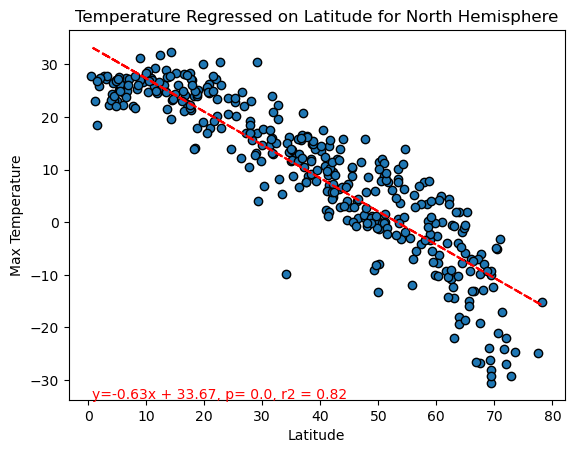

In [41]:
regress_scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Temperature Regressed on Latitude for North Hemisphere", "north_lat_temp.png")

y=0.3x + 28.16, p= 0.0, r2 = 0.46


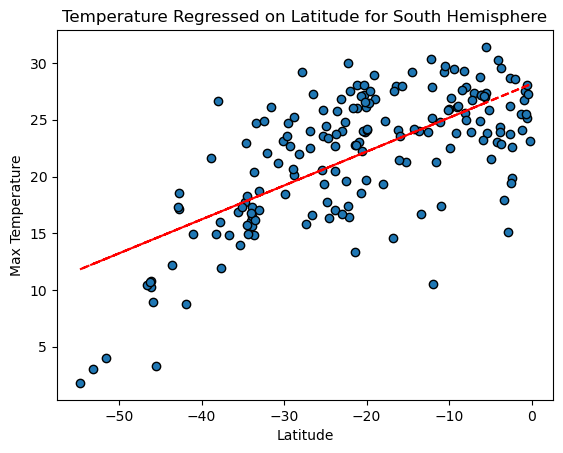

In [42]:
regress_scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature", "Temperature Regressed on Latitude for South Hemisphere", "south_lat_temp.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y=0.2x + 62.5, p= 0.0, r2 = 0.03


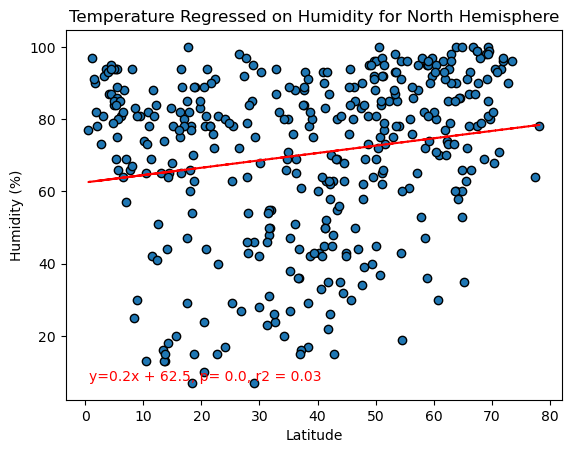

In [43]:
regress_scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Temperature Regressed on Humidity for North Hemisphere", "north_lat_humid.png")

y=0.38x + 85.82, p= 0.0, r2 = 0.15


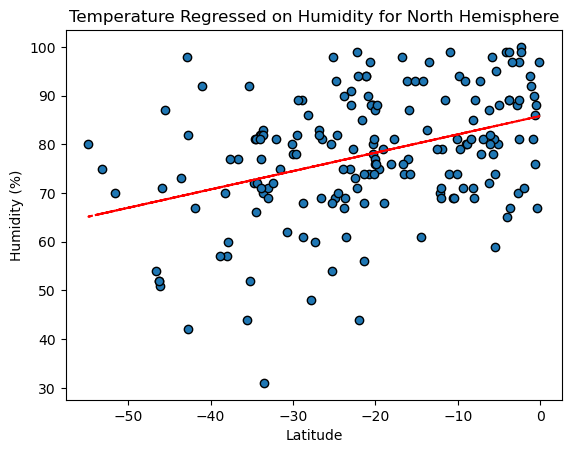

In [44]:
regress_scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Temperature Regressed on Humidity for South Hemisphere", "south_lat_humid.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [60]:
regress_scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness (%)", "Temperature Regressed on Cloudiness for North Hemisphere", "north_lat_cloud.png")

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

y=0.38x + 85.82, p= 0.0, r2 = 0.15


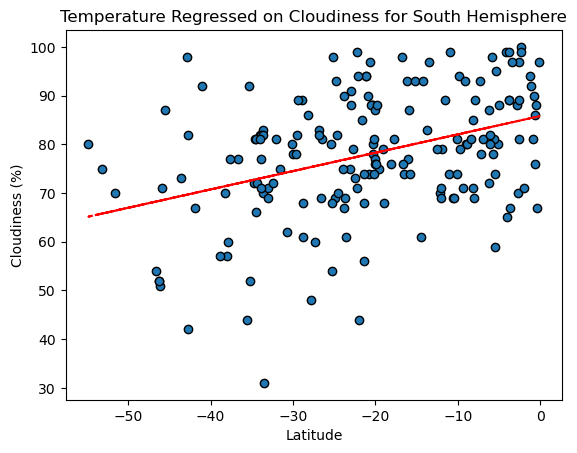

In [61]:
regress_scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Cloudiness (%)", "Temperature Regressed on Cloudiness for South Hemisphere", "north_lat_humid.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y=0.02x + 2.84, p= 0.0, r2 = 0.04


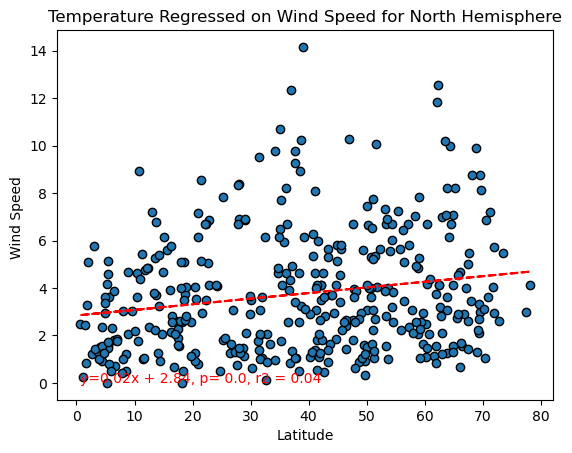

In [46]:
regress_scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed ", "Temperature Regressed on Wind Speed for North Hemisphere", "north_lat_wind.png")

y=-0.07x + 1.82, p= 0.0, r2 = 0.16


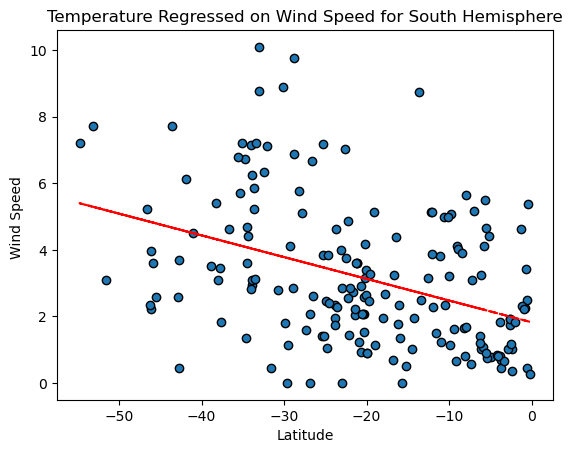

In [47]:
regress_scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed ", "Temperature Regressed on Wind Speed for South Hemisphere", "south_lat_wind.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE